Exploration

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from dateutil import parser
import pandas_profiling as pp
import time

In [ ]:
dataset = pd.read_csv('appdata10.csv', encoding = "latin1")

In [ ]:
dataset.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,02:00:00,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00.905,6,01:00:00,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,2013-03-19 19:19:09.157,1,19:00:00,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,2013-07-05 16:08:46.354,4,16:00:00,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18:00:00,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1


In [ ]:
dataset.describe()

,user,dayofweek,age,numscreens,minigame,used_premium_feature,enrolled,liked
count,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,186889.729900,3.029860,31.72436,21.095900,0.107820,0.172020,0.621480,0.165000
std,107768.520361,2.031997,10.80331,15.728812,0.310156,0.377402,0.485023,0.371184
min,13.000000,0.000000,16.00000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,93526.750000,1.000000,24.00000,10.000000,0.000000,0.000000,0.000000,0.000000
50%,187193.500000,3.000000,29.00000,18.000000,0.000000,0.000000,1.000000,0.000000
75%,279984.250000,5.000000,37.00000,28.000000,0.000000,0.000000,1.000000,0.000000
max,373662.000000,6.000000,101.00000,325.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
dataset.shape

(50000, 12)

In [ ]:
dataset.dtypes

user                     int64
first_open              object
dayofweek                int64
hour                    object
age                      int64
screen_list             object
numscreens               int64
minigame                 int64
used_premium_feature     int64
enrolled                 int64
enrolled_date           object
liked                    int64
dtype: object

Date Time data

In [ ]:
dataset['hour'] = dataset.hour.str.slice(1,3).astype(int)

In [ ]:
dataset2 = dataset.copy().drop(columns = ['user', 'screen_list', 'enrolled_date', 'first_open', 'enrolled'])
dataset2.head()

,dayofweek,hour,age,numscreens,minigame,used_premium_feature,liked
0,3,2,23,15,0,0,0
1,6,1,24,13,0,0,0
2,1,19,23,3,0,1,1
3,4,16,28,40,0,0,0
4,1,18,31,32,0,0,1


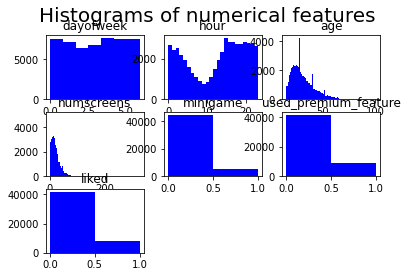

In [ ]:
plt.suptitle('Histograms of numerical features', fontsize = 20)
for i in range(1, dataset2.shape[1]+1):
  plt.subplot(3, 3, i)
  f = plt.gca()
  f.set_title(dataset2.columns.values[i-1])
  vals = np.size(dataset2.iloc[:, i-1].unique())
  plt.hist(dataset2.iloc[:, i-1], bins = vals, color = 'blue')

Correlation Matrix

In [ ]:
X = dataset2
y = dataset.enrolled

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

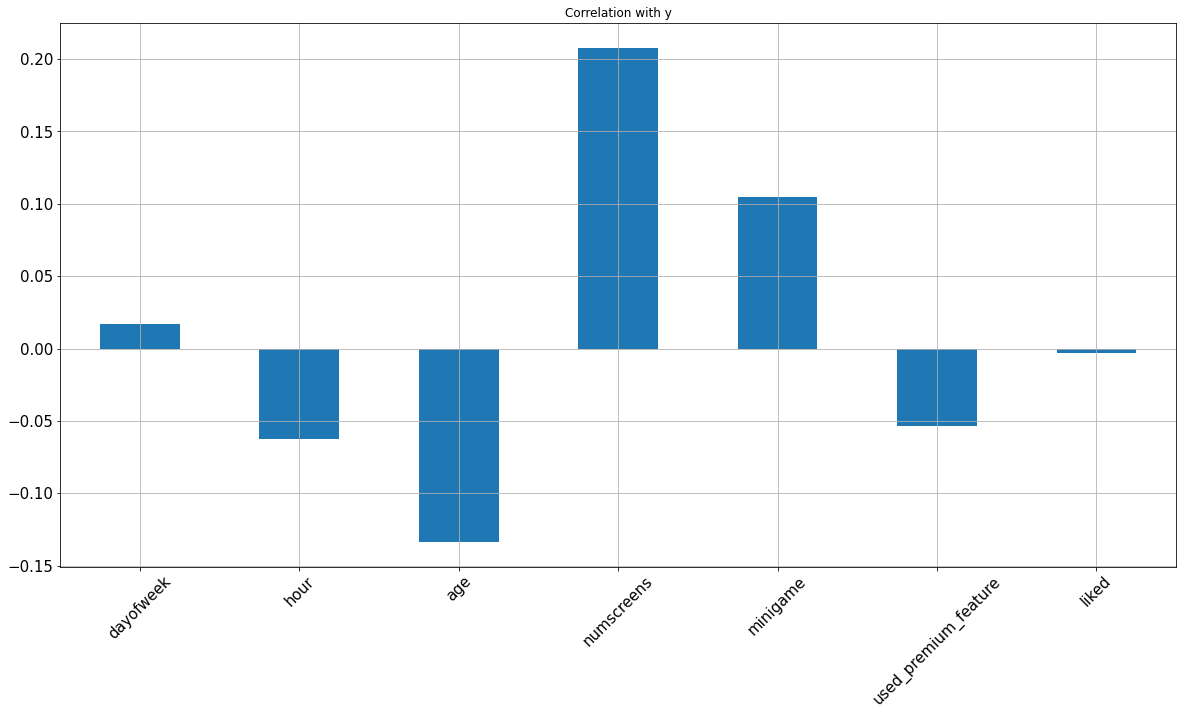

In [ ]:
X_train.corrwith(y_train).plot.bar(figsize = (20, 10), title = 'Correlation with y', fontsize = 15, rot = 45, grid = True)

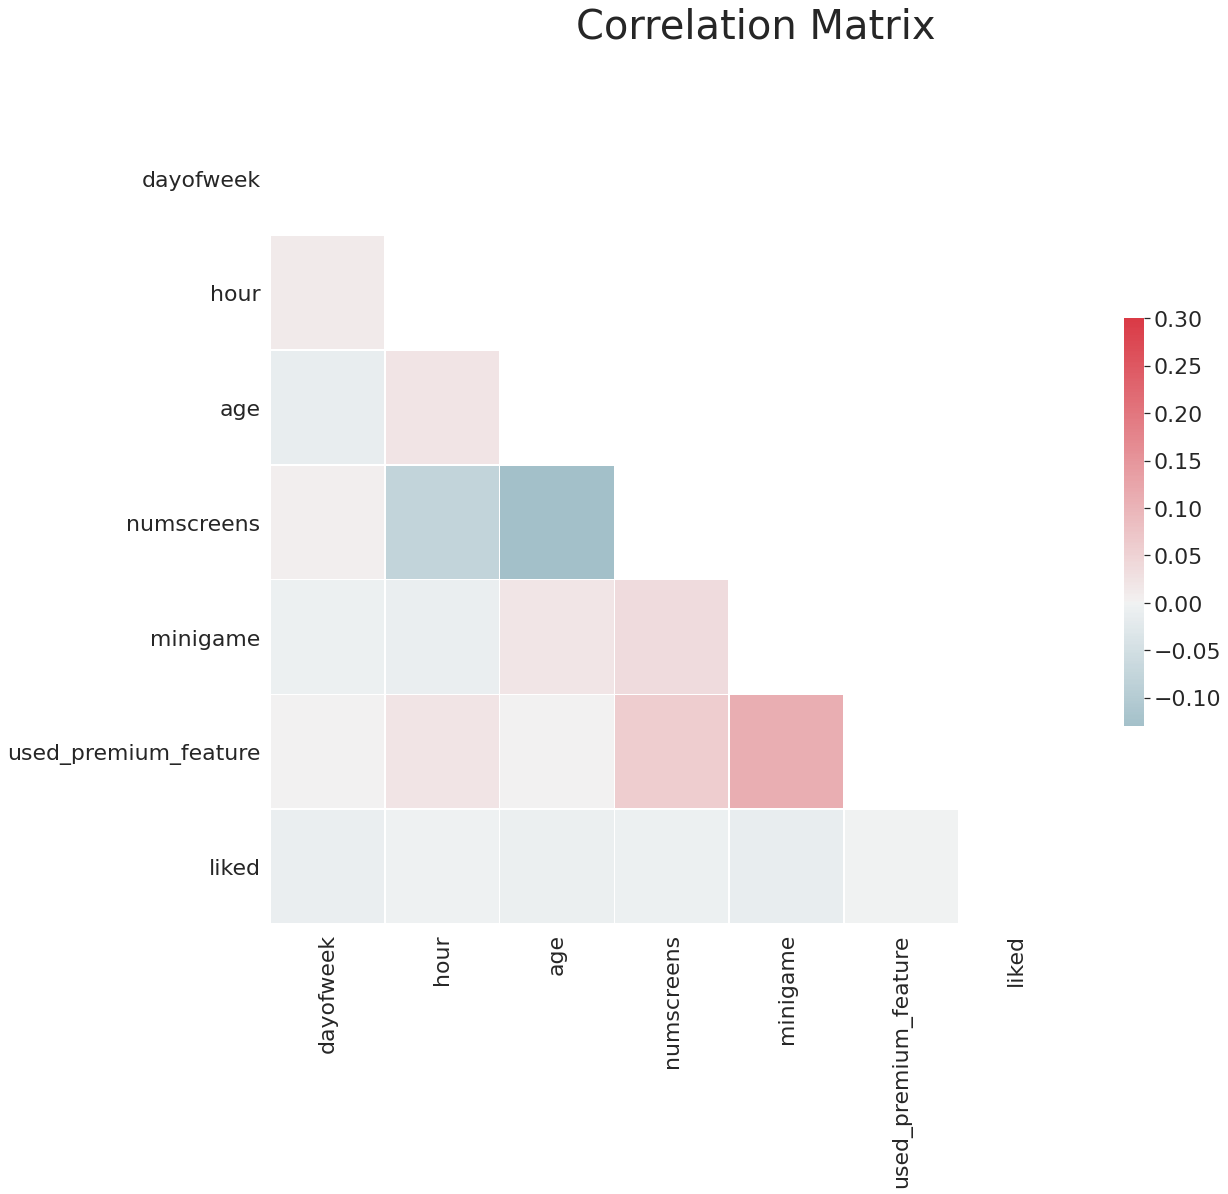

In [ ]:
sns.set(style = 'white', font_scale=2)
corr = X_train.corr()

mask = np.zeros_like(corr, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize = (18, 15))
f.suptitle('Correlation Matrix', fontsize = 40)

cmap = sns.diverging_palette(220, 10, as_cmap = True)

sns.heatmap(corr, mask = mask, cmap = cmap, vmax = 0.3, center = 0, square = True, linewidths = 0.5, cbar_kws={"shrink": 0.5})

In [ ]:
dataset["first_open"] = [parser.parse(row) for row in dataset["first_open"]]

In [ ]:
dataset["enrolled_date"] = [parser.parse(row) if isinstance(row, str) else row for row in dataset["enrolled_date"]]

In [ ]:
dataset["difference"] = (dataset["enrolled_date"] - dataset["first_open"]).astype('timedelta64[h]')

In [ ]:
dataset2 = dataset.copy().drop(columns = ['user', 'screen_list', 'enrolled', 'first_open', 'enrolled_date'])
dataset2.head()

,dayofweek,hour,age,numscreens,minigame,used_premium_feature,liked,difference
0,3,2,23,15,0,0,0,NaN
1,6,1,24,13,0,0,0,NaN
2,1,19,23,3,0,1,1,NaN
3,4,16,28,40,0,0,0,0.0
4,1,18,31,32,0,0,1,0.0


In [ ]:
X = dataset2
y = dataset.enrolled

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

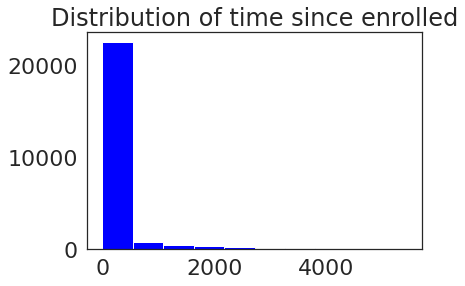

In [ ]:
plt.hist(X_train["difference"].dropna(), color = 'blue')
plt.title('Distribution of time since enrolled')
plt.show()

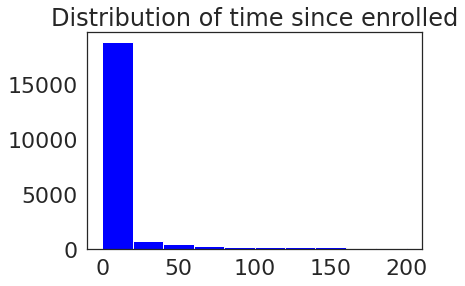

In [ ]:
plt.hist(X_train["difference"].dropna(), color = 'blue', range = [0,200])
plt.title('Distribution of time since enrolled')
plt.show()

In [ ]:
dataset.loc[dataset.difference > 48, 'enrolled'] = 0

In [ ]:
dataset2 = dataset.drop(columns = ['first_open', 'enrolled_date', 'difference'])
#'user', 'screen_list'

In [ ]:
# Please ignore this code
# top_screens
# screens = dataset["screen_list"]
# screens.head()
# screens = pd.DataFrame(screens.str.split(',', expand = True))
# screen_count = screens.apply(screens.value_counts)
# screen_count.head(2)
# screen_agg = screen_count.sum(axis = 1)
# screen_agg = screen_agg.sort_values(ascending= False)

0    idscreen,joinscreen,Cycle,product_review,ScanP...
1    joinscreen,product_review,product_review2,Scan...
2                                    Splash,Cycle,Loan
3    product_review,Home,product_review,Loan3,Finan...
4    idscreen,joinscreen,Cycle,Credit3Container,Sca...
Name: screen_list, dtype: object

In [ ]:
top_screens = pd.read_csv('top_screens.csv').top_screens.values
top_screens

array(['Loan2', 'location', 'Institutions', 'Credit3Container',
       'VerifyPhone', 'BankVerification', 'VerifyDateOfBirth',
       'ProfilePage', 'VerifyCountry', 'Cycle', 'idscreen',
       'Credit3Dashboard', 'Loan3', 'CC1Category', 'Splash', 'Loan',
       'CC1', 'RewardsContainer', 'Credit3', 'Credit1', 'EditProfile',
       'Credit2', 'Finances', 'CC3', 'Saving9', 'Saving1', 'Alerts',
       'Saving8', 'Saving10', 'Leaderboard', 'Saving4', 'VerifyMobile',
       'VerifyHousing', 'RewardDetail', 'VerifyHousingAmount',
       'ProfileMaritalStatus', 'ProfileChildren ', 'ProfileEducation',
       'Saving7', 'ProfileEducationMajor', 'Rewards', 'AccountView',
       'VerifyAnnualIncome', 'VerifyIncomeType', 'Saving2', 'Saving6',
       'Saving2Amount', 'Saving5', 'ProfileJobTitle', 'Login',
       'ProfileEmploymentLength', 'WebView', 'SecurityModal', 'Loan4',
       'ResendToken', 'TransactionList', 'NetworkFailure', 'ListPicker'],
      dtype=object)

In [ ]:
dataset["screen_list"] = dataset["screen_list"].astype(str) + ','
dataset['screen_list']

0        idscreen,joinscreen,Cycle,product_review,ScanP...
1        joinscreen,product_review,product_review2,Scan...
2                                       Splash,Cycle,Loan,
3        product_review,Home,product_review,Loan3,Finan...
4        idscreen,joinscreen,Cycle,Credit3Container,Sca...
                               ...                        
49995    Splash,Home,ScanPreview,VerifyPhone,VerifySSN,...
49996                  Cycle,Splash,Home,RewardsContainer,
49997    joinscreen,product_review,product_review2,Scan...
49998    Cycle,Home,product_review,product_review,produ...
49999    product_review,ScanPreview,VerifyDateOfBirth,V...
Name: screen_list, Length: 50000, dtype: object

In [ ]:
for sc in top_screens:
  dataset[sc] = dataset['screen_list'].str.contains(sc).astype(int)
  dataset['screen_list'] = dataset['screen_list'].str.replace(sc+',', "")

In [ ]:
dataset.screen_list.str.count(",")

0         7
1         5
2         0
3         6
4        10
         ..
49995     6
49996     1
49997     6
49998    13
49999     5
Name: screen_list, Length: 50000, dtype: int64

In [ ]:
dataset['other'] = dataset.screen_list.str.count(",")
dataset = dataset.drop(columns = ['screen_list'])

In [ ]:
#Funnels
savings_screens = ['Saving1', 'Saving2', 'Saving2Amount', 'Saving4', 'Saving5', 'Saving6', 'Saving7', 'Saving8', 'Saving9', 'Saving10']
dataset['SavingsCount'] = dataset[savings_screens].sum(axis = 1)
dataset = dataset.drop(columns = savings_screens)

cm_screens = ['Credit1', 'Credit2', 'Credit3', 'Credit3Container', 'Credit3Dashboard']
dataset['CMCount'] = dataset[cm_screens].sum(axis = 1)
dataset = dataset.drop(columns = cm_screens)

cc_screens = ['CC1', 'CC1Category', 'CC3']
dataset['CCCount'] = dataset[cc_screens].sum(axis = 1)
dataset = dataset.drop(columns = cc_screens)

loan_screens = ['Loan', 'Loan2', 'Loan3', 'Loan4']
dataset['LoansCount'] = dataset[loan_screens].sum(axis = 1)
dataset = dataset.drop(columns = loan_screens)

In [ ]:
dataset.head()

,user,first_open,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked,difference,location,Institutions,VerifyPhone,BankVerification,VerifyDateOfBirth,ProfilePage,VerifyCountry,Cycle,idscreen,Splash,RewardsContainer,EditProfile,Finances,Alerts,Leaderboard,VerifyMobile,VerifyHousing,RewardDetail,VerifyHousingAmount,ProfileMaritalStatus,ProfileChildren,ProfileEducation,ProfileEducationMajor,Rewards,AccountView,VerifyAnnualIncome,VerifyIncomeType,ProfileJobTitle,Login,ProfileEmploymentLength,WebView,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,other,SavingsCount,CMCount,CCCount,LoansCount
0,235136,2012-12-27 02:14:51.273,3,2,23,15,0,0,0,NaT,0,NaN,0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,7,0,0,0,1
1,333588,2012-12-02 01:16:00.905,6,1,24,13,0,0,0,NaT,0,NaN,1,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,1
2,254414,2013-03-19 19:19:09.157,1,19,23,3,0,1,0,NaT,1,NaN,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,234192,2013-07-05 16:08:46.354,4,16,28,40,0,0,1,2013-07-05 16:11:49.513,0,0.0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,6,0,3,0,1
4,51549,2013-02-26 18:50:48.661,1,18,31,32,0,0,1,2013-02-26 18:56:37.841,1,0.0,0,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10,0,2,0,1


In [ ]:
dataset = dataset.drop(columns = ['enrolled_date', 'first_open', 'difference'])
dataset.head()

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,location,Institutions,VerifyPhone,BankVerification,VerifyDateOfBirth,ProfilePage,VerifyCountry,Cycle,idscreen,Splash,RewardsContainer,EditProfile,Finances,Alerts,Leaderboard,VerifyMobile,VerifyHousing,RewardDetail,VerifyHousingAmount,ProfileMaritalStatus,ProfileChildren,ProfileEducation,ProfileEducationMajor,Rewards,AccountView,VerifyAnnualIncome,VerifyIncomeType,ProfileJobTitle,Login,ProfileEmploymentLength,WebView,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,other,SavingsCount,CMCount,CCCount,LoansCount
0,235136,3,2,23,15,0,0,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,7,0,0,0,1
1,333588,6,1,24,13,0,0,0,0,1,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,1
2,254414,1,19,23,3,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,234192,4,16,28,40,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,6,0,3,0,1
4,51549,1,18,31,32,0,0,1,1,0,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10,0,2,0,1


In [ ]:
dataset.columns

Index(['user', 'dayofweek', 'hour', 'age', 'numscreens', 'minigame',
       'used_premium_feature', 'enrolled', 'liked', 'location', 'Institutions',
       'VerifyPhone', 'BankVerification', 'VerifyDateOfBirth', 'ProfilePage',
       'VerifyCountry', 'Cycle', 'idscreen', 'Splash', 'RewardsContainer',
       'EditProfile', 'Finances', 'Alerts', 'Leaderboard', 'VerifyMobile',
       'VerifyHousing', 'RewardDetail', 'VerifyHousingAmount',
       'ProfileMaritalStatus', 'ProfileChildren ', 'ProfileEducation',
       'ProfileEducationMajor', 'Rewards', 'AccountView', 'VerifyAnnualIncome',
       'VerifyIncomeType', 'ProfileJobTitle', 'Login',
       'ProfileEmploymentLength', 'WebView', 'SecurityModal', 'ResendToken',
       'TransactionList', 'NetworkFailure', 'ListPicker', 'other',
       'SavingsCount', 'CMCount', 'CCCount', 'LoansCount'],
      dtype='object')

In [ ]:
dataset.to_csv("cleaned_appdata10.csv", index = False)

In [ ]:
y = dataset.enrolled
X = dataset.drop(columns = 'enrolled')

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
sum(y_train.values) * 100 / 40000

49.805

In [ ]:
train_identifier = X_train['user']
test_identifier = X_test['user']
X_train = X_train.drop(columns = 'user')
X_test = X_test.drop(columns = 'user')

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train2 = pd.DataFrame(sc.fit_transform(X_train))
#SS returns numpy
X_test2 = pd.DataFrame(sc.transform(X_test))
X_train2.columns = X_train.columns.values
X_train2.index = X_train.index.values
X_test2.columns = X_test.columns.values
X_test2.index = X_test.index.values
X_train = X_train2
X_test = X_test2

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0, penalty = 'l1', solver = 'liblinear') #screens correlation
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
accuracy_score(y_test, y_pred)

0.7681

In [ ]:
f1_score(y_test, y_pred)

0.7659703300030276

In [ ]:
precision_score(y_test, y_pred)

0.7618952017667135

In [ ]:
recall_score(y_test, y_pred)

0.7700892857142857

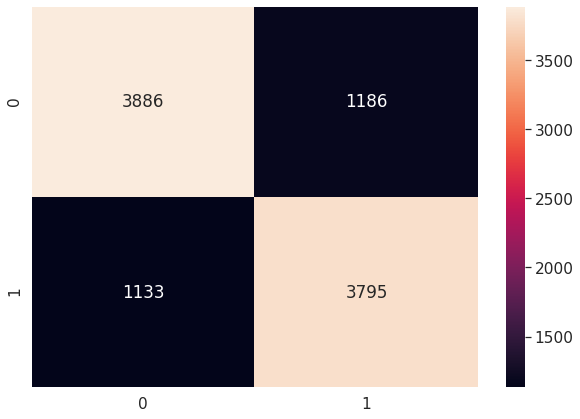

In [ ]:
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, index = (0,1), columns = (0,1))
plt.figure(figsize = (10, 7))
plt.xlabel('Predicted')
plt.ylabel('Actual')
sns.set(font_scale = 1.4)
sns.heatmap(df_cm, annot = True, fmt = 'g')

In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X=X_train, y=y_train, cv = 10)
print('Mean Accuracy : %0.3f' %accuracies.mean())
print('Accuracy standard deviation : %0.3f' %(accuracies.std()*2))

Mean Accuracy : 0.767
Accuracy standard deviation : 0.005Accuracy standard deviation : 0.005


In [ ]:
final_results = pd.concat([y_test, test_identifier], axis = 1).dropna()
final_results['predicted_results'] = y_pred
final_results[['user', 'enrolled', 'predicted_results']].reset_index(drop = True)

,user,enrolled,predicted_results
0,239786,1,1
1,279644,1,1
2,98290,0,0
3,170150,1,1
4,237568,1,1
...,...,...,...
9995,143036,1,0
9996,91158,1,1
9997,248318,0,0
9998,142418,1,1
